In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

   year  month  royalty_number  total_sale
0  2023      7           False       29690
1  2023      7            True       45790
2  2023      8           False       28670
3  2023      8            True       43080
4  2023      9           False       28290
5  2023      9            True       44270


<Figure size 1000x1000 with 0 Axes>

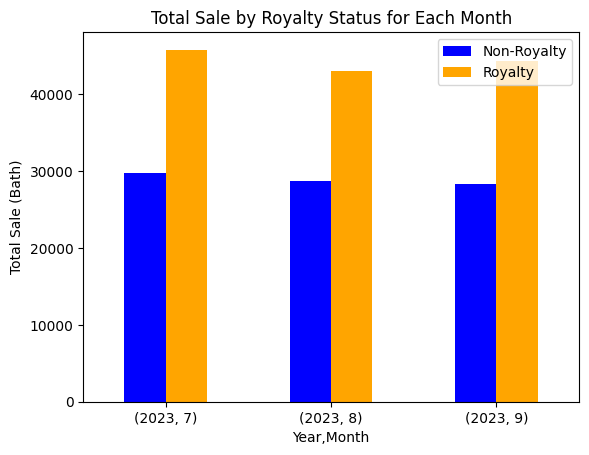

In [8]:
# ---
# Group No. 2
# 1. จิรกานต์  แก้วภิรมภ์    6410450389
# 2. ธนัตถ์     แซ่ฉั่ว         6410450478
# 3. อาทิตยา เกตเลขวัตร  6410451938
# ---

group = 2
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"_output_"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"_plot_"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
#ในที่นี้คือการลบคอลัมน์ 1, 3, 5, 6, และ 7 ออก
data = data.drop(columns=['transaction_id', 'time', 'drink_type', 'unit_price', 'unit_sold'])

#แปลงคอลัม "date" เป็นชนิดข้อมูล DateTime
data['date'] = pd.to_datetime(data['date'])

#สร้างคอลัม "year" และ "month" จากคอลัม "date"
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

#ลบคอลัม "date" ออก
data = data.drop(columns=['date'])

#เรียงลำดับคอลัม "year" และ "month" และให้คอลัม "royalty_number" อยู่ด้านหลัง
data = data.sort_values(by=['year', 'month', 'royalty_number'], ascending=[True, True, False])

def check_royalty_number(royalty_number):
  """
  ตรวจสอบว่าค่าในคอลัมน์ royalty_number เป็นตัวเลข 4 ตัวหรือไม่

  Args:
    royalty_number: ค่าในคอลัมน์ royalty_number

  Returns:
    TRUE ถ้าค่าในคอลัมน์ royalty_number เป็นตัวเลข 4 ตัว
    FALSE ถ้าค่าในคอลัมน์ royalty_number ไม่ใช่ตัวเลข 4 ตัว
  """
  length = len(royalty_number)
  if length == 4:
    return True
  else:
    return False

# เรียกใช้ฟังก์ชัน
data['royalty_number'] = data['royalty_number'].apply(check_royalty_number)

#ต้องการรวมรายการที่มี "year" และ "month" เดียวกันในแถวเดียวกัน คุณสามารถใช้ groupby และ sum
data = data.groupby(['year', 'month', 'royalty_number']).sum().reset_index()

# สร้างกราฟ
plt.figure(figsize=(10, 10))
colors = {True: 'orange', False: 'blue'}

# กลุ่มข้อมูลตาม 'royalty_number' และสีของแท่ง
grouped = data.groupby(['year', 'month', 'royalty_number'])['total_sale'].sum().unstack(fill_value=0)
grouped.plot(kind='bar', color=[colors[False], colors[True]])

# ตกแต่งกราฟ ตั้งชื่อแกน x ,หมุนชื่อเดือนในแกน x=0 ,ตั้งชื่อแกน y ,ตั้งชื่อกราฟ
plt.xlabel('Year,Month')
plt.xticks(rotation=0)
plt.ylabel('Total Sale (Bath)')
plt.title('Total Sale by Royalty Status for Each Month')
plt.legend(title='Royalty Status')
plt.legend(['Non-Royalty', 'Royalty'])

#--- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
print(data)

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()